<a href="https://colab.research.google.com/github/Anisha-singh2207/Anisha-singh2207/blob/main/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Data Loading and Understanding

In [ ]:
#read the csv data to a pandas dataframe
df=pd.read_csv("/content/train.csv")

Initial Inspection

In [ ]:
df.shape
#Rows: The first value represents the number of rows in the DataFrame.
#Columns: The second value represents the number of columns in the DataFrame.

(800, 22)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
#'display.max_columns': This is the option that controls the maximum number of columns displayed when a DataFrame is printed.
#None: Setting this to None means no limit on the number of columns displayed, so all columns will be shown when printing the DataFrame.
pd.set_option('display.max_columns',None)

In [ ]:
df.info()
#The df.info() method in pandas provides a concise summary of a DataFrame, including essential details about its structure and the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#convert age column datatype to integer
df["age"]=df["age"].astype(int)

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)
#The code you've provided will print only the non-numerical columns in the DataFrame df

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
# Drop or remove  the columns 'ID' and 'age_desc'
df=df.drop(columns=["ID","age_desc"])

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns
# print the column's value

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()
#basically it will not return countries name twice

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#define the mapping dictionary for country names
mapping={
    "Viet Nam":"Vietname",
    "AmericaSamoa":"United Sates",
    "Hong Kong":"china"
}

#replace value in the country column
df["contry_of_res"]=df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietname', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'china',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#target class distribution
# this will return number of 1s and 2s in the class Class/ASD
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Insights
1.missing values in ethnicity & relation

2.age_desc column has only 1 unique value.so it is removed as it is not important for prediction

3.fixex country names

4.identified class imbalance in the target column









3.Exploration Data Analysis (EDA)

In [ ]:
df.shape


(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis

Numerical Columns:



* age
*  result



In [ ]:
#set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 27.96375
median: 24.0


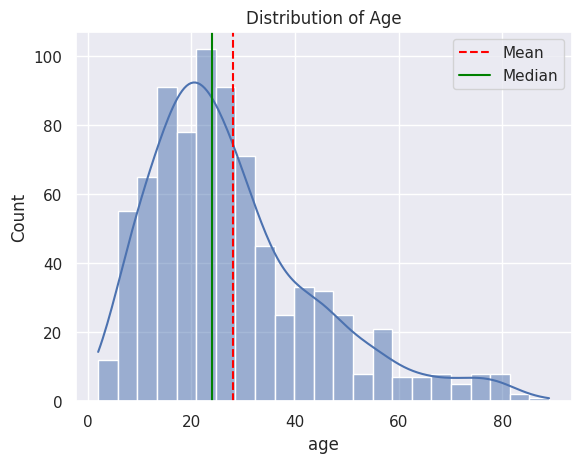

In [ ]:
#Histogram for "age"
sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")

#calculate the mean and median
age_mean=df["age"].mean()
age_median=df["age"].median()

print("Mean:",age_mean)
print("median:",age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")

plt.legend()
plt.show()
plt.show()

Mean: 8.537303106501248
median: 9.605299308


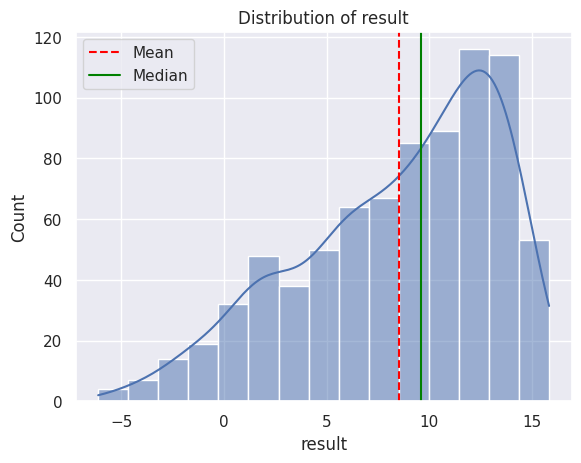

In [ ]:
#Histogram for "result"
sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")

#calculate the mean and median
result_mean=df["result"].mean()
result_median=df["result"].median()

print("Mean:",result_mean)
print("median:",result_median)

#add vertical lines for mean and median
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="green",linestyle="-",label="Median")

plt.legend()
plt.show()


Box plots for identifying outliers in the numerical columns

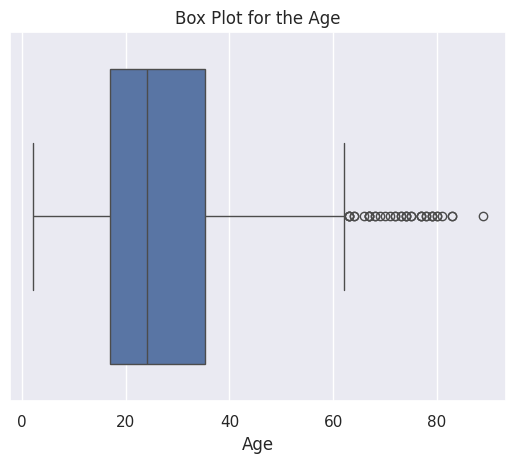

In [ ]:
#box plots
sns.boxplot(x=df["age"])
plt.title("Box Plot for the Age")
plt.xlabel("Age")
plt.show()

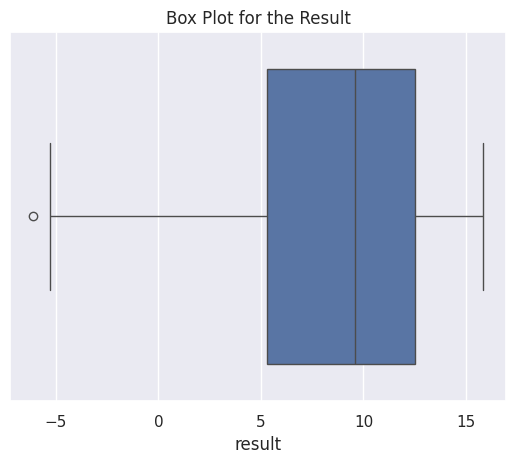

In [ ]:
#box plots
sns.boxplot(x=df["result"])
plt.title("Box Plot for the Result")
plt.xlabel("result")
plt.show()

In [ ]:
#count the outliers using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df["age"]<lower_bound)|(df["age"]>upper_bound)]

In [ ]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [ ]:
len(age_outliers)

39

In [ ]:
#count the outliers using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["result"]<lower_bound)|(df["result"]>upper_bound)]

In [ ]:
len(result_outliers)

1

Univariate analysis of categroical columns

In [ ]:
df.columns


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

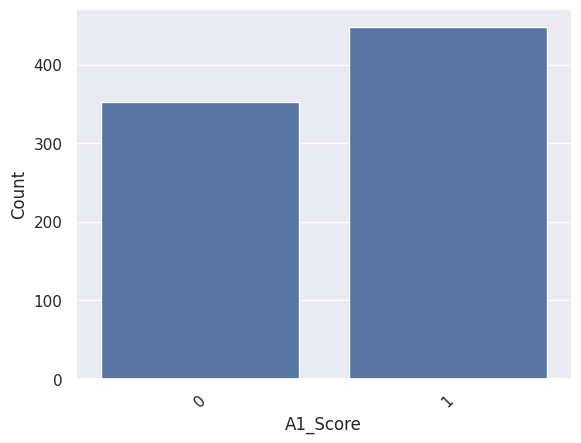

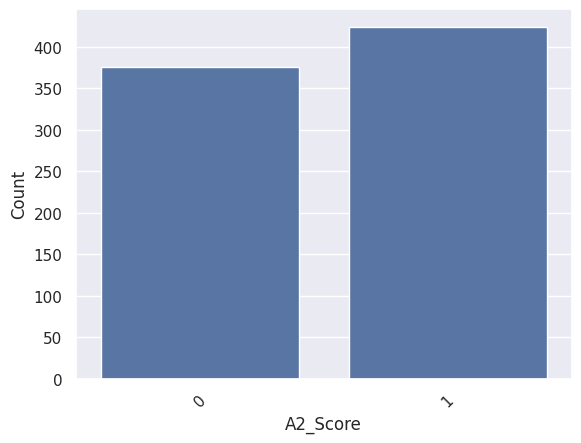

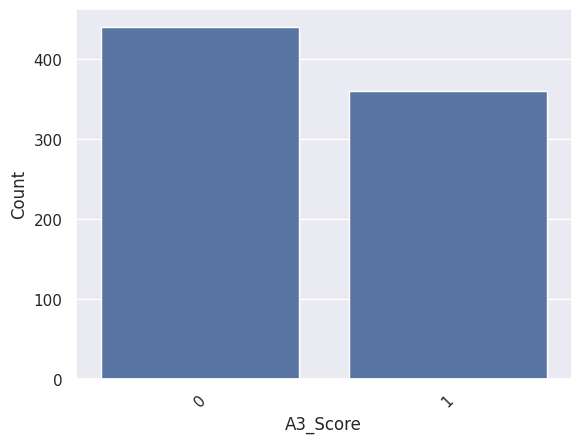

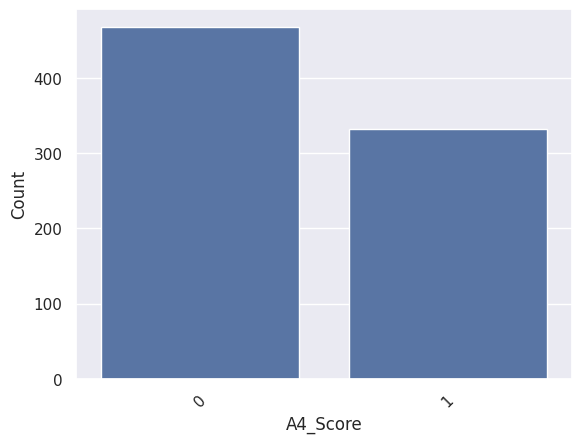

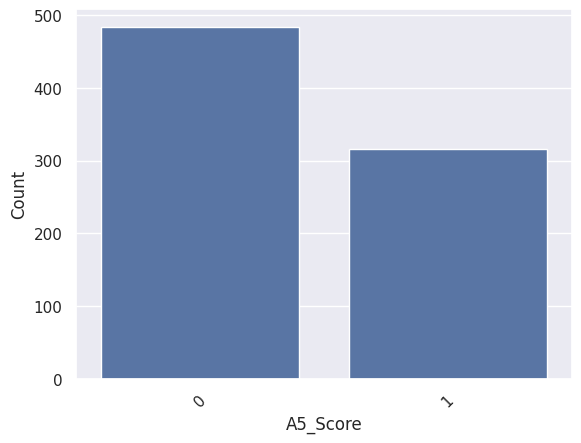

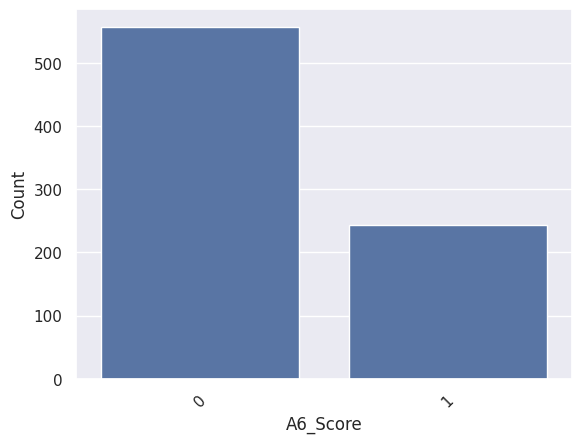

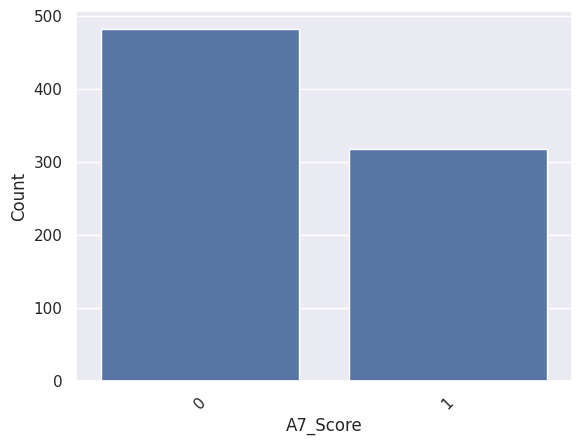

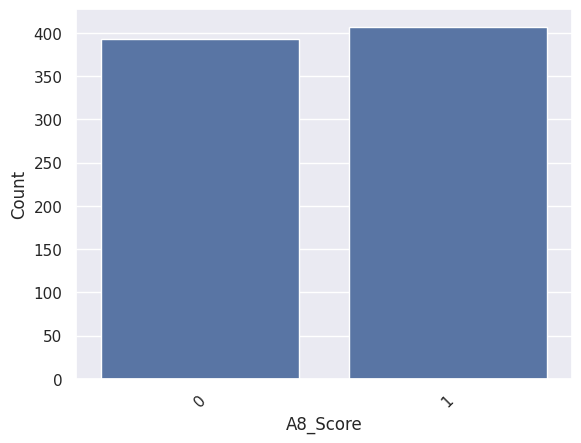

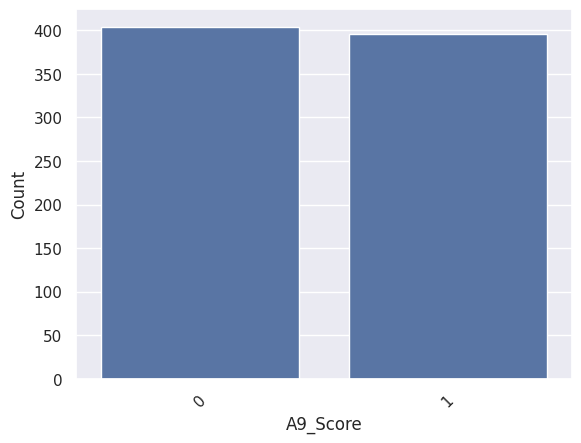

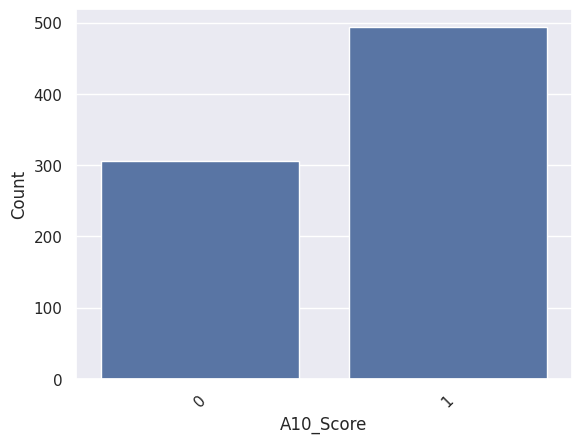

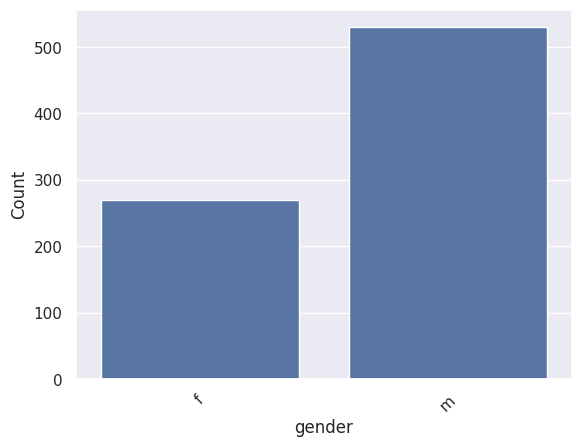

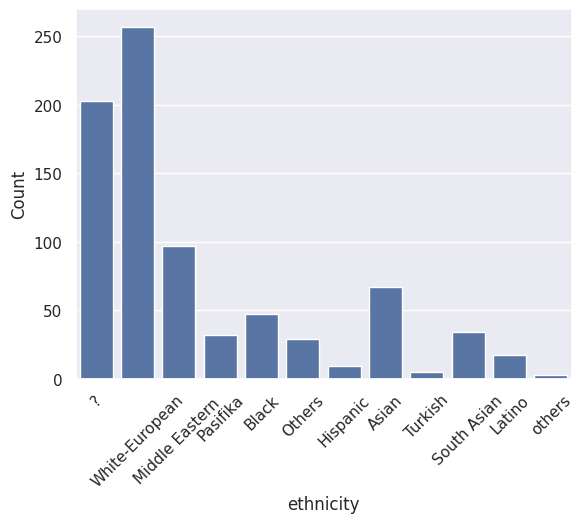

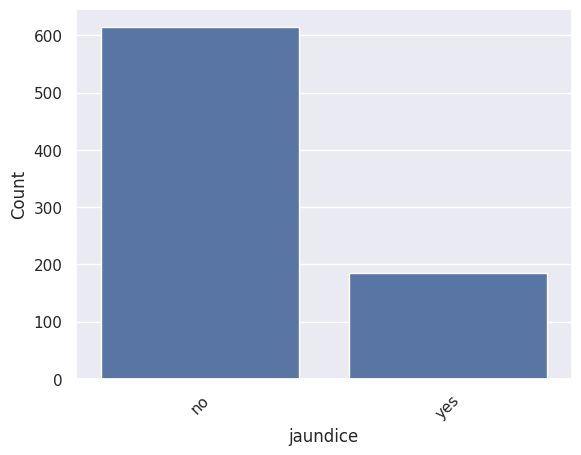

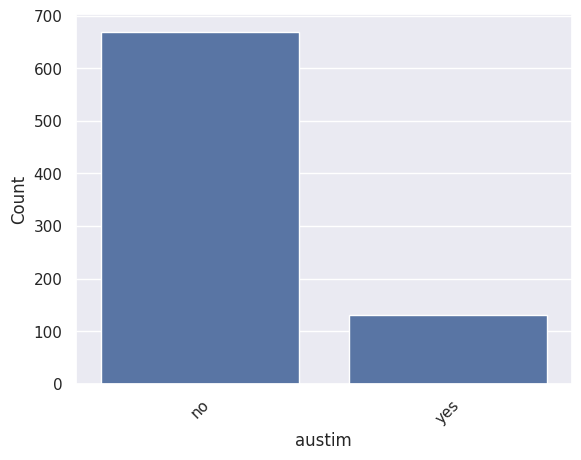

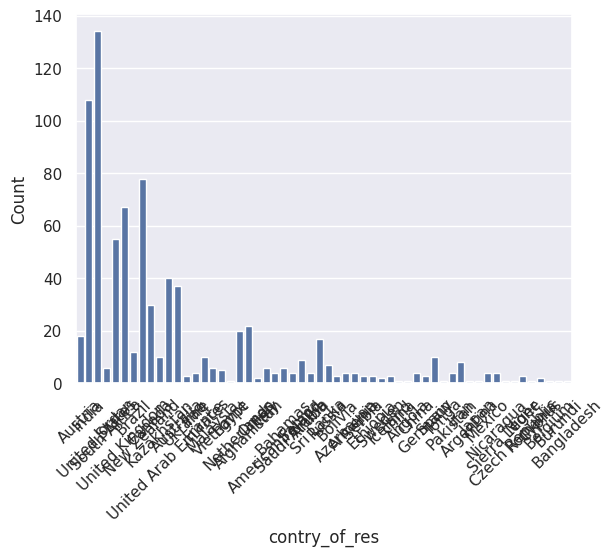

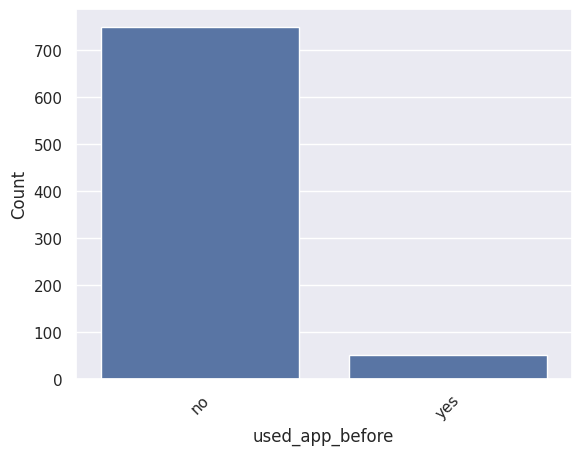

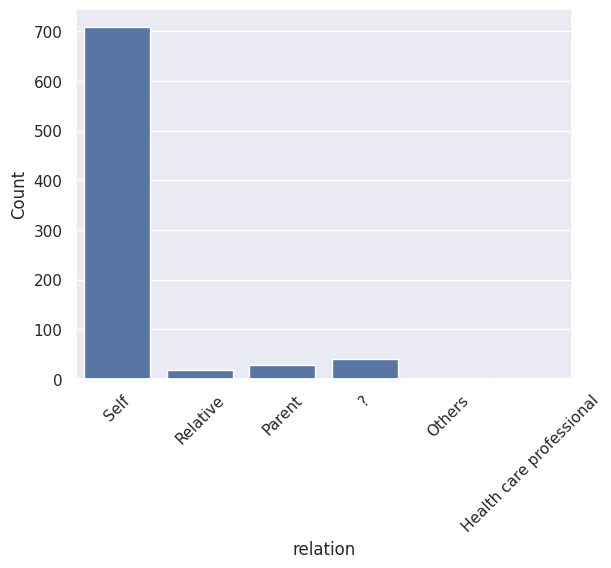

In [ ]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation',
                     ]

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title=(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()


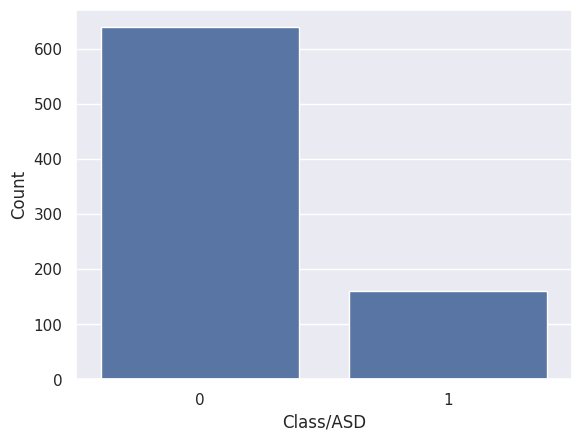

In [ ]:
# countplot for target column
sns.countplot(x=df["Class/ASD"])
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


handle missing values in ethinicity and relation column

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others": "Others"})


In [ ]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df["relation"]=df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
      "Parent":"Others",
      "Health care professional":"Others",
    }
)

In [ ]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [ ]:
# identidy columns with "object" data types or non-numerical values
object_columns=df.select_dtypes(include=["object"]).columns

In [ ]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the encoders
encoders = {}

# Apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  # Apply label encoding
    encoders[column] = label_encoder  # Store the encoder for this column

# Save the encoders as a pickle file after processing all columns
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


Bivariant Analysis

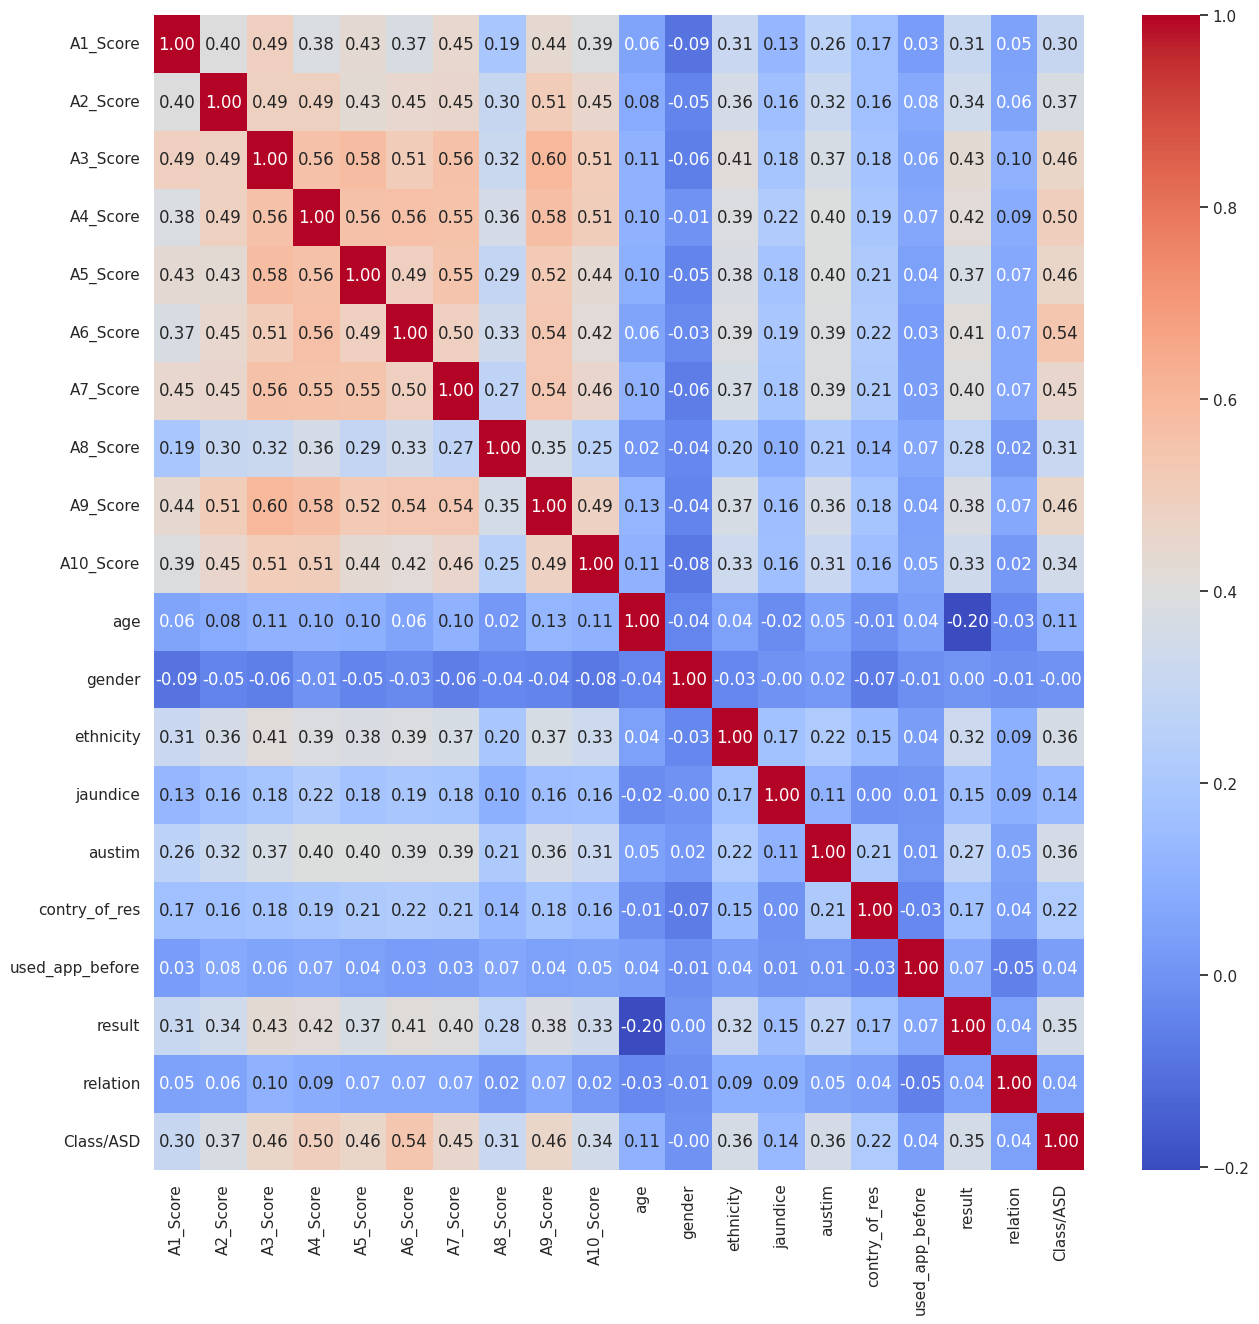

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a figure and axes for the heatmap
plt.figure(figsize=(15, 15))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")



# Display the heatmap
plt.show()

Insights from EDA



*   There are few ouliers in the numerical columns {age,results}
*   there is a class imbalance in the target column

1.   There is a class imbalance in the categorical features
2.   We dont have any highly correlated column


1.   Performed label encoding and saved the encoders








Data preprocessing

Handling the outliers

In [ ]:
# function to replace the outliers with median
# because median is not affected by outliers
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR


  df[column].median()

  #replace the outliers with median values
  df[column]=df[column].apply(lambda x:df[column].median() if x<lower_bound or x>upper_bound else x)
  return df

In [ ]:
# replace outliers in the "age" column
df=replace_outliers_with_median(df,"age")

# replace outliers in the "result" column
df=replace_outliers_with_median(df,"result")


In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [ ]:
df.shape

(800, 20)

Train test Split

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
x=df.drop(columns=["Class/ASD"]) # x will not contain class/ASD
y=df["Class/ASD"] # y will contain class/ASD

In [ ]:
 print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(800, 19) (640, 19) (160, 19)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(Synthetic,Minority,Oversampling technique)

In [ ]:
smote=SMOTE(random_state=42)
# for handling class imbalance

In [ ]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [ ]:
print(y_train_smote.shape)

(1030,)


**Model Training**

In [ ]:
# dictionary of classifier
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


In [ ]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [ ]:
# dictionary to store the cross validation results
cv_scores={}

#performs 5-fold cross validation for each model
for model_name,model in  models.items():
  print("Training {model_name} with default parameters...")
  scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} Cross-Validation Accuracy:{np.mean(scores):.2f}" )
  print("-"*50)


Training {model_name} with default parameters...
Decision Tree Cross-Validation Accuracy:0.86
--------------------------------------------------
Training {model_name} with default parameters...
Random Forest Cross-Validation Accuracy:0.92
--------------------------------------------------
Training {model_name} with default parameters...
XGBoost Cross-Validation Accuracy:0.90
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.80582524, 0.87378641, 0.87864078, 0.86893204, 0.88834951]),
 'Random Forest': array([0.92718447, 0.91747573, 0.91262136, 0.91262136, 0.91262136]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89805825, 0.90291262, 0.90776699])}

6.Model selection and hyper parameters Tunning

In [ ]:
# Initializng models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [ ]:
# Hyperparameters grids for RandomizedsearchCV

param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,20,50,70],
    "min_samples_split":[7,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "max_depth":[3,5,7,10],
    "subsample":[0.8,0.9,1.0],
    "colsample_bytree":[0.8,0.9,1.0]
}


In [ ]:
# hyperparameters tuning for 3 tree based models

# the below steps can be automated by using a for loop or  by using a pipeline

#perform RandomizedSearchCV for each model
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring="accuracy",random_state=42)



In [ ]:
# fit the models
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8679611650485437
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.925242718446602


In [ ]:
#get the model with best score
best_model=None
best_score=0
if random_search_dt.best_score_> best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_

  if random_search_rf.best_score_ > best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_

    if random_search_xgb.best_score_ > best_score:
      best_model=random_search_xgb.best_estimator_
      best_score=random_search_xgb.best_score_


In [ ]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation accuracy : {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross-Validation accuracy : 0.93


In [ ]:
#save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [ ]:
#evaluate on test data
y_test_pred=best_model.predict(x_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.8375
Confusion matrix:
 [[109  15]
 [ 11  25]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160

